In [1]:
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
from model import Model

In [2]:
C1 = matplotlib.colors.to_rgb('#196CA9') #S color
C2 = matplotlib.colors.to_rgb('#56AA6D') #R color

In [3]:
model = Model(mat=0.7, res_ratio=0.5, inf_ratio=1, N_iter=200)
Sj, Sa, Ij, Ia = model.run_sim()

Text(0, 0.5, 'Adult transmission')

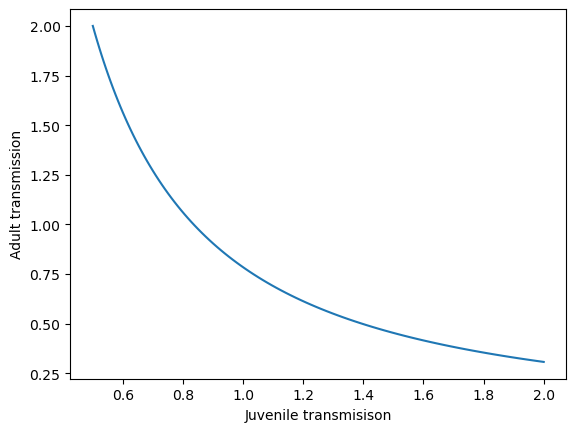

In [4]:
plt.plot(model.resJ, model.resA)
plt.xlabel('Juvenile transmisison')
plt.ylabel('Adult transmission')

Text(0.5, 0, 'Evolutionary Time')

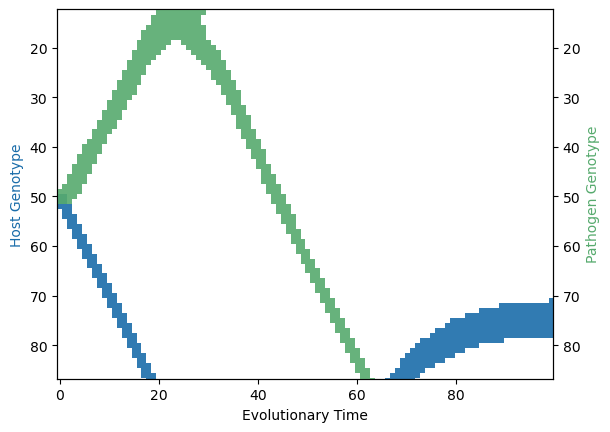

In [5]:
from PIL import Image

fix, ax1 = plt.subplots()
ax2 = ax1.twinx()

Sa_img = Sa / np.max(Sa)
Ia_img = Ia / np.max(Ia)
Sa_img = np.array(Image.fromarray(Sa).resize(size=(100,100)))
Ia_img = np.array(Image.fromarray(Ia).resize(size=(100,100)))
Sa_img[Sa_img >= 0.2] = 1
Sa_img[Sa_img < 0.2] = 0
Ia_img[Ia_img >= 0.2] = 1
Ia_img[Ia_img < 0.2] = 0

Sa_alpha = np.ones(Sa_img.shape)*0.9
Ia_alpha = np.ones(Ia_img.shape)*0.9
Sa_alpha[Sa_img == 0] = 0
Ia_alpha[Ia_img == 0] = 0

s_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",C1])
i_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white",C2])

ax1.imshow(Sa_img, alpha=Sa_alpha, cmap=s_cmap)
ax2.imshow(Ia_img, alpha=Ia_alpha, cmap=i_cmap)

ax1.set_ylabel('Host Genotype', color=C1)
ax2.set_ylabel('Pathogen Genotype', color=C2)
ax1.set_xlabel('Evolutionary Time')

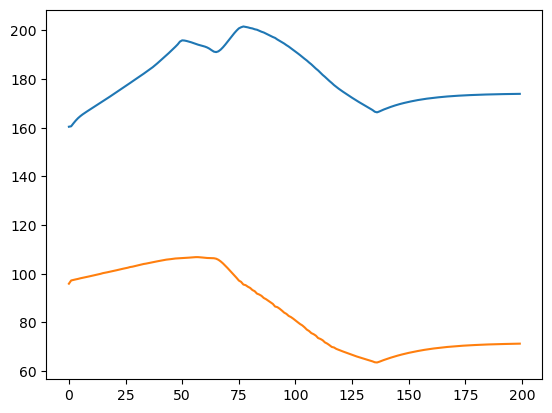

In [6]:
fig, ax = plt.subplots()
ax.plot(np.sum(Sa, axis=0))
ax.plot(np.sum(Sj, axis=0))

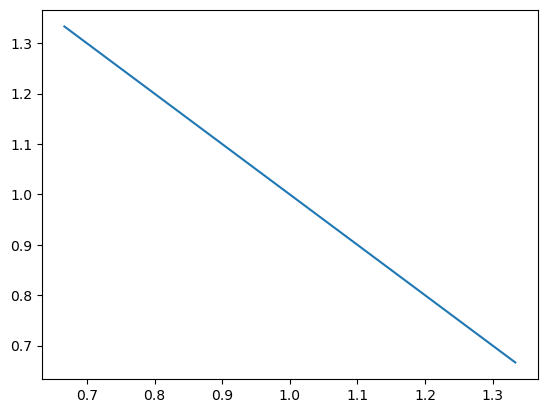

In [7]:
res_ratio = 1
res_avg = 1

x = np.linspace(0.5, 2, 100)

resJ_max = 2*res_avg/(x + 1)
resA_max = 2*res_avg*x/(x + 1)

plt.plot(resJ_max, resA_max)